In [1]:
import random
import statsmodels.api as sm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# This notebook contains implementation of Linear Regression from scratch.

It's implemented in simplified manner (when we have one predictor), so our equation wil looks follows:

$$ Y = \beta_0 + \beta_1X $$

Where:

* $\beta_0$ — the intercept of our regression line (this is a value when $X=0$),

* $\beta_1$ — the slope of our regression line (the average amount by which $Y$ will increase with a one-unit increase in $X$).

To estimate $\hat{\beta_{0}}$, $\hat{\beta_{1}}$ we need minimize $RSS$ — it is *Residual Sum of Squares*.

*Residual Sum of Squares* can be understood as a measure of variation in response variable $y$ that is left unexplained after performing a regression.

Our method to minimize RSS is called *least squares*.

RSS can be written as:

$$ \text{RSS} = e_{1}^{2} + e_{2}^{2} + \dots + e_{n}^{2} $$

When $e$ stands for a *residual* and is a simply difference between our $i$th prediction of response variable $\hat{y}$ and $i$th true value of $y$:

$e_{i} = y_{i} - \hat{y_{i}}$

Our prediction of a response variable $y$ looks following:

$\hat{y} = \beta_0 + \beta_1X$ 

So, our goal is to change coefficients $\beta$ in a such way to minize RSS and get as best estimations as possible.

To minimize RSS, we need optimize $\beta$ coefficients:

$$\beta_0 = \bar{y} - \beta_1\bar{x}$$ 

Where:
* $\bar{y}$ — a mean of a response variable $y$,
* $\bar{x}$ — a mean of a predictor $x$.

$$\beta_1 = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_{i} - \bar{y})}{\sum_{i=1}^{n}(x_{i} - \bar{x})^{2}}$$



In [2]:
data = pd.read_csv("../datasets/Advertising.csv", index_col=0)

In [3]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


### We are going to regress `sales` onto `TV` (in other words we are going to predict how many units of sales we will get if we will increase 1000$ in advertising of `TV`)  

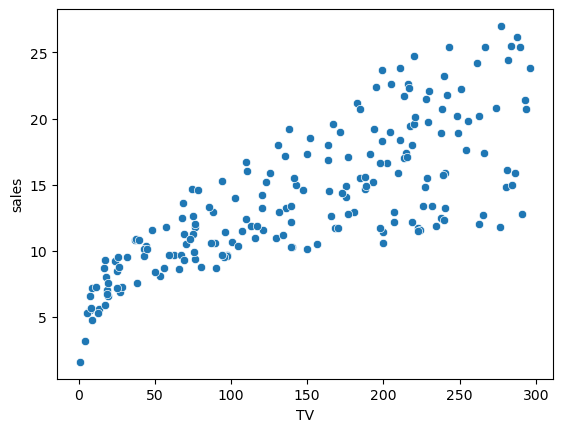

In [4]:
sns.scatterplot(x="TV", y="sales", data=data);

### We can see a positive tendency here — the sales are increasing as TV increases as well.

In [5]:
class SLP:
    def __init__(self):
        self._coeffs = np.random.normal(
            0, 0.1, 2
        )  # we will initalize coefficients in a random way, first is an intercept, second is a slope
        print(
            f"Coeffs init: [{self._coeffs[0]:.4f}, {self._coeffs[-1]:.4f}]"
        )  # print initial state of our parameters

    def fit(self, X_train, y_train):
        for _ in range(
            2
        ):  # due to already written formulas to optimize our paremetrs we need only two times to perform a training
            self.rss = 0
            for x, y in zip(X_train, y_train):
                y_hat = self.predict(x)  # get prediction of y
                residual = (
                    y - y_hat
                )  # calculate resiudal as an error of our prediction and true value of y
                self.rss += np.square(residual)

            print(
                f"RSS: {self.rss}; coeffs: [{self._coeffs[0]:.4f}, {self._coeffs[-1]:.4f}]"
            )

            # optimizing coefficients by least squares from a formula
            self._coeffs[1] = np.sum(
                (X_train - X_train.mean()) * (y_train - y_train.mean())
            ) / np.sum(np.square(X_train - X_train.mean()))
            self._coeffs[0] = y_train.mean() - self._coeffs[1] * X_train.mean()

        return self

    def predict(self, X):
        return self._coeffs[0] + self._coeffs[1] * X

    @property
    def coeffs(self):
        return self._coeffs

In [6]:
model = SLP()  # SimpleLinearRegression
X, y = data.iloc[:, 0].to_numpy().reshape(-1, 1), data.iloc[:, -1].to_numpy().reshape(
    -1, 1
)  # we pick `TV` and `sales` respectively
model.fit(X, y);

Coeffs init: [0.1194, -0.2624]
RSS: [694102.78007254]; coeffs: [0.1194, -0.2624]
RSS: [2102.53058313]; coeffs: [7.0326, 0.0475]


### Let's plot our model and its residuals

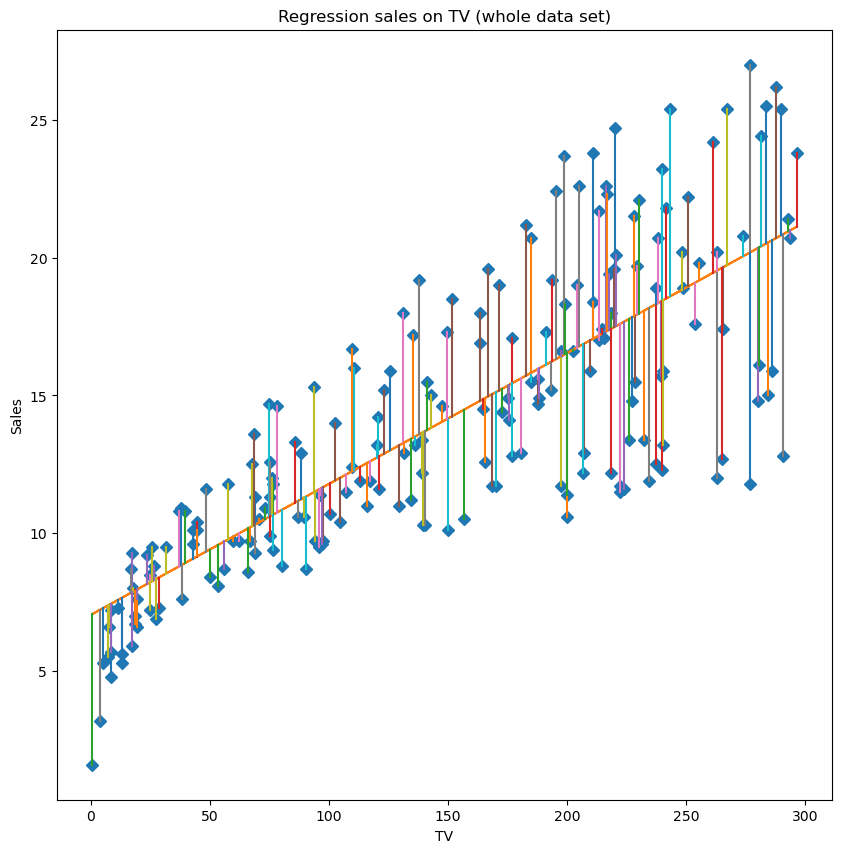

In [7]:
y_pred = model.predict(X)

fig = plt.figure(figsize=(10, 10))
axes = fig.add_subplot(111)
axes.plot(X, y, "D")
axes.plot(X, y_pred)

for i in range(X.shape[0]):
    lineXdata = (X[i], X[i])
    lineYdata = (y[i], y_pred[i])
    plt.plot(lineXdata, lineYdata)

axes.set_xlabel("TV")
axes.set_ylabel("Sales")

plt.title("Regression sales on TV (whole data set)");

### As we can see $\beta_0 = 7.0326, \beta_1 = 0.0475$ — in other words we can see that if we increase 1000\$ to an advertising of `TV` we would get $0.0475 \cdot 1000 = 47$ sold units more. Also, on average without any investing on `TV` we would like to get $7.0326 \cdot 1000 = 7032$ units. 

### Let's also investigate the contour plot of our estimated coefficients $\beta_0$ and $\beta_1$ with respect to RSS value

In [8]:
beta_0, beta_1 = model.coeffs

B0 = np.linspace(beta_0 - 2, beta_0 + 2, 200)
B1 = np.linspace(beta_1 - 0.02, beta_1 + 0.02, 200)
X, Y = np.meshgrid(B0, B1, indexing="xy")
Z = np.zeros((B0.size, B1.size))

for (i, j), _ in np.ndenumerate(Z):
    Z[i, j] = np.sum(np.square(data["sales"] - (X[i, j] + Y[i, j] * data["TV"]))) / 1000

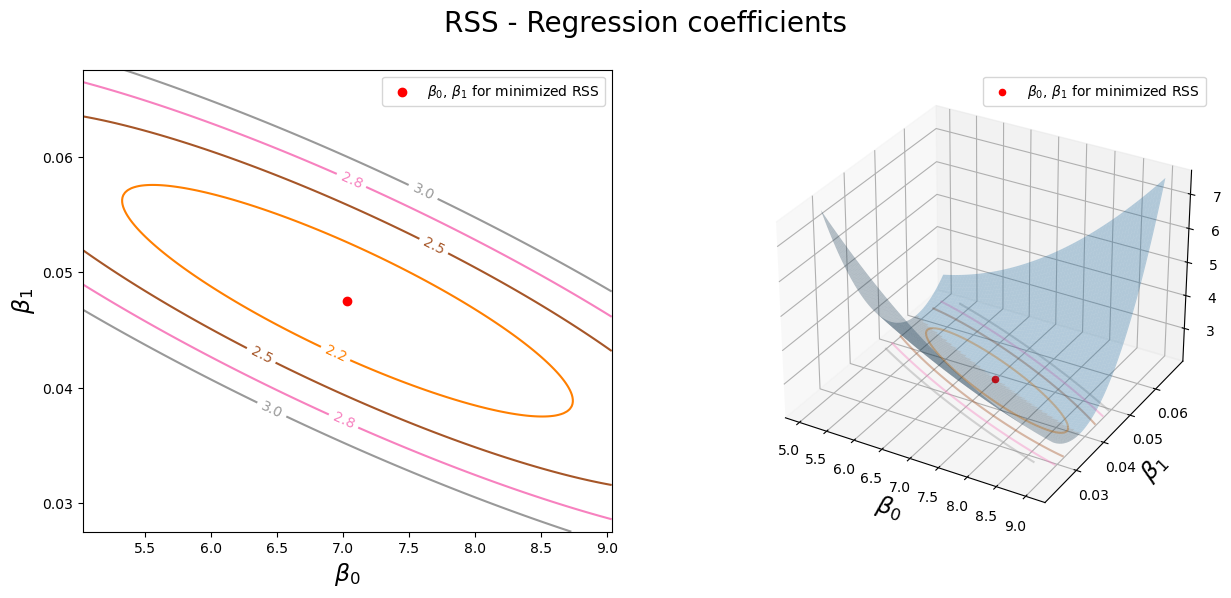

In [9]:
fig = plt.figure(figsize=(15, 6))
fig.suptitle("RSS - Regression coefficients", fontsize=20)

min_rss = np.sum(np.square(data["sales"] - (beta_0 + beta_1 * data["TV"]))) / 1000

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection="3d")

min_RSS = r"$\beta_0$, $\beta_1$ for minimized RSS"
CS = ax1.contour(X, Y, Z, cmap=plt.cm.Set1, levels=[1.5, 1.75, 2, 2.25, 2.5, 2.75, 3])
ax1.scatter(beta_0, beta_1, c="r", label=min_RSS)
ax1.clabel(CS, inline=True, fontsize=10, fmt="%1.1f")

ax2.plot_surface(X, Y, Z, rstride=3, cstride=3, alpha=0.3)

ax2.contour(
    X,
    Y,
    Z,
    zdir="z",
    offset=Z.min(),
    cmap=plt.cm.Set1,
    alpha=0.4,
    levels=[1.5, 1.75, 2, 2.25, 2.5, 2.75, 3],
)

ax2.scatter3D(beta_0, beta_1, min_rss, c="r", label=min_RSS)
ax2.set_zlabel("RSS")
ax2.set_zlim(Z.min(), Z.max())
ax2.set_ylim(0.02, 0.07)

for ax in fig.axes:
    ax.set_xlabel(r"$\beta_0$", fontsize=17)
    ax.set_ylabel(r"$\beta_1$", fontsize=17)
    ax.set_yticks([0.03, 0.04, 0.05, 0.06])
    ax.legend()

### Now, we would like to know how our estimation of $\beta$ coefficients are good enough to a true underlying relationship of $f$

Quick mention that:

$$ Y = f(X) + \epsilon $$

the $f$ can be written as:

$$f = \beta_0 + \beta_1X$$

We want to estimate this $f$ using:

$$\hat{f} = \hat{\beta_0} + \hat{\beta_1}X$$

So, in an essence $\hat{f}$ is estimation of our coefficients from a Linear Regression model.

$\hat{\beta_0}$ and $\hat{\beta_1}$ are our estimated coefficients which can be far away from a true unknown $\beta_0$ and $\beta_1$.

To check whether our estimations are far away, we need calculate the *Standard Error* which measures on average how estimated $\beta$ coefficients are far from true unknown $\beta$:

$$ SE(\hat{\beta_{0}})^2 = \sigma^{2}\left[\frac{1}{n} + \frac{\bar{x}^2}{\sum_{i=1}^{n}(x_{i} - \bar{x})^{2}}\right] $$

$$ SE(\hat{\beta_{1}})^2 = \frac{\sigma^{2}}{\sum_{i=1}^{n}(x_{i} - \bar{x})^{2}} $$

where:

$\sigma^{2} = \text{Var}({\epsilon})$ — which is not known, but we can get an esimation using *residual standard error*: $RSE = \sqrt{\frac{RSS}{(n - 2)}}$


In [10]:
model.rss

array([2102.53058313])

### First we want an estimation of *Residual Standard Error*

RSE can be explained as a *lack of fit* of our model to a true underyling relationship of $f$. 

Is an average amount that our response will deviate from a true regression line.

In simpler terms, we can conclude:
* if $\hat{y} \approx y$ is very small (approximation) $ \implies $ low RSE,
  
* if $\hat{y} \approx y$ is very huge (approximation) $ \implies $ high RSE.

In [11]:
RSE = np.sqrt(model.rss[0] / (X.shape[0] - 2))
RSE

3.2586563686504624

### From that, we can conclude that on average our sales in each market will deviate by 3258 units from a true regression line

### Now, lets calculate a SE intervals

SE (standard errors) can be used for a following reason:
* for *hypothesis testing*,
* for calculation of *confidence intervals*.

Confidence intervals can be usefull to check if a true unknown value of coefficient is included in interval.

In other words, with 95% probability the interval

$$ \hat{\beta_1} \pm 2 \cdot \text{SE}(\hat{\beta_1}) $$

In other words:

$$ \left[\hat{\beta_{1}} - 2 \cdot \text{SE}(\hat{\beta_1}), \hat{\beta_{1}} + 2 \cdot \text{SE}(\hat{\beta_1}) \right] $$

will include a true value unknown coefficient $\beta_1$.

Similarly, $\beta_0$.

In [12]:
SE_beta_1 = np.sqrt(np.square(RSE) / np.sum(np.square(X - X.mean())))

### Confidence interval for $\beta_1$

In [13]:
model.coeffs[-1]  # our estimated beta_1

0.047536640433019736

In [14]:
print(
    f"[{model.coeffs[-1] - 2 * SE_beta_1:.4f}, {model.coeffs[-1] + 2 * SE_beta_1:.4f}]"
)

[0.0195, 0.0756]


### We can see that in this particular interval a real true $\beta_1$ is included. So we can also conclude that adding 1000\$ in television advertising we get increase in sales on average by 42 to 53 units.

### Now let's calculate SE for $\beta_0$

In [15]:
SE_beta_0 = np.sqrt(
    np.square(RSE)
    * ((1 / X.shape[0]) + np.square(X.mean()) / np.sum(np.square(X - X.mean())))
)

In [16]:
model.coeffs[0]  # our intercept, beta_0

7.0325935491276965

In [17]:
print(f"[{model.coeffs[0] - 2 * SE_beta_0:.4f}, {model.coeffs[0] + 2 * SE_beta_0:.4f}]")

[6.5312, 7.5340]


### We can see that in this particular interval a real true $\beta_0$ is included. So we can also conclude that without adding any  additional advertising we get sales on average by 6120 units to 7950.

### Now, what about accuracy of our measures?

To check if our regression is accurate, we can use:

* RSE,
* $R^{2}$.

### $R^{2}$ measure

To explain in simple terms $R^{2}$ we need to understand RSS first.

As I mentioned earlier RSS can be understood as left unexplained variance of response $y$ after application of regression.

$$RSS = e_{1}^{2} + e_{2}^{2} + \dots + e_{n}^{2} = (y_{1} - \hat{y_{1}})^{2} + (y_{2} - \hat{y_{2}})^{2} + \dots + (y_{i} - \hat{y_{i}})^{2}$$

$R^{2}$ consists of RSS and *TSS* (total sum of squares) which stands for a total variance of response $y$ which is **inherent** and this variance is present before application of regression.

$$TSS = \sum_{i = 1}^{n}(y_{i} - \bar{y})^{2}$$

Where:
* $\bar{y}$ — mean of response $y$.

So, $\text{TSS} - \text{RSS}$ is the amount of variance that left explained after performing regression. 

$R^{2}$ is a *proportion* measure and values of $R^{2}$ are in $[0, 1]$ interval.

And finally, $R^{2}$ is a proportion of a variability in $Y$ that can be explained using $X$:

$$R^{2} = \frac{\text{TSS} - \text{RSS}}{\text{TSS}}$$

### Let's calculate $\text{TSS}$ and $R^{2}$ respectively

In [18]:
TSS = np.sum(np.square(y - y.mean()))

TSS

5417.14875

In [19]:
r_squared = (TSS - model.rss[0]) / TSS

r_squared

0.6118750508500711

### $0.611$ of $R^{2}$ means that predictor `TV` explains in $\frac{2}{3}$ variability of response $y$


### That would be everything! 

#### Thanks for reading this mathematical jargon and hope you've learnt some insights about Linear Regression.
#### Keep learnig!
#### KP